# Image Classification using SVM (sklearn library `sklearn.svm`)

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

import skimage
from skimage.io import imread
from skimage.transform import resize

### Load images in structured directory like it's sklearn sample dataset

In [3]:
def load_image_files(container_path, dimension=(64, 64)):
    """
    Load image files with categories as subfolder names 
    which performs like scikit-learn sample dataset
    
    Parameters
    ----------
    container_path : string or unicode
        Path to the main folder holding one subfolder per category
    dimension : tuple
        size to which image are adjusted to
        
    Returns
    -------
    Bunch
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    skipped = 0
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            try:
                img = skimage.io.imread(file)
                img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
                flat_data.append(img_resized.flatten()) 
                images.append(img_resized)
                target.append(i)
            except:
                skipped = skipped + 1
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr),skipped

In [4]:
image_dataset, skipped = load_image_files("Datasets/Cucumber")
# FORMAT DU DATASET :
#       PLANTE
#             HEALTHY
#             MALADIE1
#             MALEDIE2


c:\Users\diopm\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))
c:\Users\diopm\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
C:\Users\diopm\AppData\Local\Temp\ipykernel_10152\407202377.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  flat_data = np.array(flat_data)
C:\Users\diopm\AppData\Local\Temp\ipykernel_10152\407202377.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do th

ValueError: could not broadcast input array from shape (64,64,3) into shape (64,64)

In [5]:
image_dataset

NameError: name 'image_dataset' is not defined

In [5]:
len(image_dataset.images)

309

In [6]:
image_dataset.images[0].shape

(64, 64, 3)

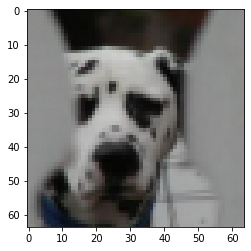

In [7]:
plt.imshow(image_dataset.images[5])

### Split data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

### Train data with parameter optimization

In [9]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

### Prediction for the dataset

In [11]:
y_pred = clf.predict(X_test)

In [20]:
len(X_test[0])

12288

### Report / Results

In [1]:
result = clf.score(X_test, y_test)
print("Score :",result)

NameError: name 'clf' is not defined

In [12]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}]):
              precision    recall  f1-score   support

           0       0.75      0.55      0.63        22
           1       0.87      0.76      0.81        17
           2       0.85      0.79      0.81        14
           3       0.55      0.71      0.62        17
           4       0.85      1.00      0.92        23

    accuracy                           0.76        93
   macro avg       0.77      0.76      0.76        93
weighted avg       0.77      0.76      0.76        93




### CHECKING PREDICTIONS

In [13]:
y_pred

array([2, 4, 2, 4, 4, 0, 1, 4, 4, 4, 3, 1, 4, 3, 3, 1, 4, 4, 2, 3, 2, 0,
       3, 3, 4, 1, 1, 3, 3, 4, 1, 3, 3, 1, 4, 2, 0, 1, 4, 4, 0, 0, 1, 2,
       3, 0, 3, 3, 0, 4, 4, 4, 4, 3, 4, 0, 1, 2, 3, 3, 3, 2, 0, 3, 1, 0,
       3, 0, 2, 1, 2, 0, 0, 1, 0, 4, 4, 4, 2, 3, 1, 2, 3, 3, 1, 0, 4, 0,
       4, 4, 4, 2, 4])

In [14]:
y_test

array([2, 4, 3, 4, 4, 0, 1, 4, 4, 4, 3, 1, 4, 3, 3, 1, 4, 4, 2, 0, 2, 0,
       3, 0, 4, 1, 1, 0, 3, 2, 1, 3, 3, 1, 4, 2, 0, 1, 4, 0, 0, 0, 2, 2,
       0, 0, 1, 3, 0, 2, 4, 4, 4, 0, 4, 0, 1, 2, 0, 3, 3, 1, 3, 0, 0, 3,
       3, 1, 2, 1, 2, 3, 0, 1, 0, 4, 4, 4, 2, 0, 1, 2, 3, 1, 1, 0, 3, 0,
       4, 4, 4, 2, 4])

## Prediction on single image

In [33]:
imgTest = skimage.io.imread("images\pizza\image_0001.jpg")
dimension=(64,64)
imgTest = resize(imgTest, dimension, anti_aliasing=True, mode='reflect')
imgTest = imgTest.flatten()
myTest = []
myTest.append(imgTest)


In [34]:
pred = clf.predict(myTest)

In [36]:
pred[0]

2

In [39]:
indice = pred[0]
print(image_dataset.target_names[indice])

pizza


## Save Model

In [ ]:
# save the model to disk
import pickle
filename = 'svm_model.sav'
pickle.dump(clf, open(filename, 'wb'))

## Load a model


In [ ]:
# load the model from disk
import pickle
filename = 'svm_model.sav'
clf = pickle.load(open(filename, 'rb'))
result = clf.score(X_test, y_test)
print(result)